# Data Science Project: Individual Planning Report

In [1]:
# Load necessary libraries
library(tidyverse)
library(lubridate)
library(janitor) # for clean_names function

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




## Data Description

The dataset for this project contains information about players and their gaming sessions in a MineCraft research server operated by a UBC Computer Science research group. The data is split across two files:

**Refer to data analysis for source of statistic values.**

### 1. `players.csv` (196 observations, 7 variables)

| Variable | Type | Description |
|----------|------|-------------|
| experience | String | Player's experience level (Pro, Veteran, Amateur, Regular, Beginner) |
| subscribe | Boolean | Whether the player has subscribed to the game-related newsletter |
| hashed_email | String | Hashed email address (unique player identifier) |
| played_hours | Float | Total hours played by the player |
| name | String | Player's name |
| gender | String | Player's gender |
| Age | Float | Player's age |

**Player statistics:**
- Mean played_hours: 5.85 hours
- Age distribution ranges from children (min. 8 years) to adults (max. 50 years); the mean is 20.52

### 2. `sessions.csv` (1535 observations, 5 variables)

| Variable | Type | Description |
|----------|------|-------------|
| hashed_email | String | Hashed email address (links to players.csv) |
| start_time | String | Session start time in DD/MM/YYYY HH:MM format |
| end_time | String | Session end time in DD/MM/YYYY HH:MM format |
| original_start_time | Float | Session start time as Unix timestamp (milliseconds) |
| original_end_time | Float | Session end time as Unix timestamp (milliseconds) |

**Session statistics:**
- Average sessions per player: 12.28
- Maximum sessions for a single player: 310
- Minimum sessions for a single player: 1

**Potential issues in the data:**
- age and played_hours variables may contain missing or zero values
- Timestamp format needs proper parsing for analysis
- Wide variance in player engagement metrics may require normalization
- Players with only one session might not provide enough data for reliable analysis
- Hashed_email link between datasets needs to be validated to ensure correct joins

## Questions

### Broad Question
Question 2: We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

### Specific Question
Can age, gender, experience level and session frequency predict total session time per player?

1. The `players.csv` file contains demographic and experience information
2. The `sessions.csv` file tracks player engagement through session frequency and duration
3. Combined, these datasets allow us to identify correlations between player attributes and data contribution volumes
4. The hashed_email field enables linking player profiles to their gameplay patterns

## Exploratory Data Analysis and Visualization

### Players Data Wrangling

In [2]:
# Load players data
players <- url("https://raw.githubusercontent.com/arevaura/dsci-100-2024w2-group-9/refs/heads/main/data/players.csv") |>
    read.csv() |>
    clean_names()
head(players, n=5)

,experience,subscribe,hashed_email,played_hours,name,gender,age
,<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
1,Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
2,Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
3,Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
4,Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
5,Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21


In [3]:
# Calculate mean values for quantitative variables in players.csv
player_means <- players |>
    summarize(
        mean_age = mean(age, na.rm = TRUE),
        mean_played_hours = mean(played_hours, na.rm = TRUE)
    )

player_means

mean_age,mean_played_hours
<dbl>,<dbl>
20.52062,5.845918


In [4]:
# Calculate experience distribution
experience_dist <- players |> 
    count(experience)
experience_dist

experience,n
<chr>,<int>
Amateur,63
Beginner,35
Pro,14
Regular,36
Veteran,48


### Sessions Data Wrangling

In [5]:
# Load sessions data
sessions_raw <- url("https://raw.githubusercontent.com/arevaura/dsci-100-2024w2-group-9/refs/heads/main/data/sessions.csv") |>
    read.csv() |>
    clean_names()
head(sessions_raw, n=5)

,hashed_email,start_time,end_time,original_start_time,original_end_time
,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
2,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
3,f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
4,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
5,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12


In [6]:
# Format the datetimes in sessions.csv to have a more useful data type
sessions_dttm <- sessions_raw |>
    mutate(
        start_time = dmy_hm(start_time),
        end_time = dmy_hm(end_time)
    ) |>
    select(-starts_with("original")) # removes original datetime numbers

In [7]:
# Add a session duration column to the dataframe
sessions <- sessions_dttm |>
    mutate(
        duration_minutes = as.numeric(end_time - start_time, units="mins"),
        duration_hours = as.numeric(end_time - start_time, units="hours")
    )
head(sessions, n=5)
summary(sessions)

,hashed_email,start_time,end_time,duration_minutes,duration_hours
,<chr>,<dttm>,<dttm>,<dbl>,<dbl>
1,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 18:12:00,2024-06-30 18:24:00,12,0.2000000
2,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 23:33:00,2024-06-17 23:46:00,13,0.2166667
3,f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 17:34:00,2024-07-25 17:57:00,23,0.3833333
4,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-07-25 03:22:00,2024-07-25 03:58:00,36,0.6000000
5,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-25 16:01:00,2024-05-25 16:12:00,11,0.1833333


 hashed_email         start_time                    
 Length:1535        Min.   :2024-04-06 09:27:00.00  
 Class :character   1st Qu.:2024-05-20 20:28:00.00  
 Mode  :character   Median :2024-06-24 02:51:00.00  
                    Mean   :2024-06-24 03:54:03.51  
                    3rd Qu.:2024-07-25 06:56:00.00  
                    Max.   :2024-09-26 06:09:00.00  
                                                    
    end_time                      duration_minutes duration_hours  
 Min.   :2024-04-06 09:31:00.00   Min.   :  3.00   Min.   :0.0500  
 1st Qu.:2024-05-20 21:37:00.00   1st Qu.:  9.00   1st Qu.:0.1500  
 Median :2024-06-23 22:04:00.00   Median : 30.00   Median :0.5000  
 Mean   :2024-06-24 02:26:18.03   Mean   : 50.86   Mean   :0.8476  
 3rd Qu.:2024-07-25 07:00:00.00   3rd Qu.: 73.00   3rd Qu.:1.2167  
 Max.   :2024-09-26 07:39:00.00   Max.   :259.00   Max.   :4.3167  
 NA's   :2                        NA's   :2        NA's   :2       

In [8]:
# Calculate statistics for sessions.csv
session_stats <- sessions |> 
    count(hashed_email) |> 
    select(n) |> 
    summarize(
        mean_num_sessions = mean(n),
        max_num_sessions = max(n),
        min_num_sessions = min(n)
    )
session_stats

mean_num_sessions,max_num_sessions,min_num_sessions
<dbl>,<int>,<int>
12.28,310,1


### Visualizations

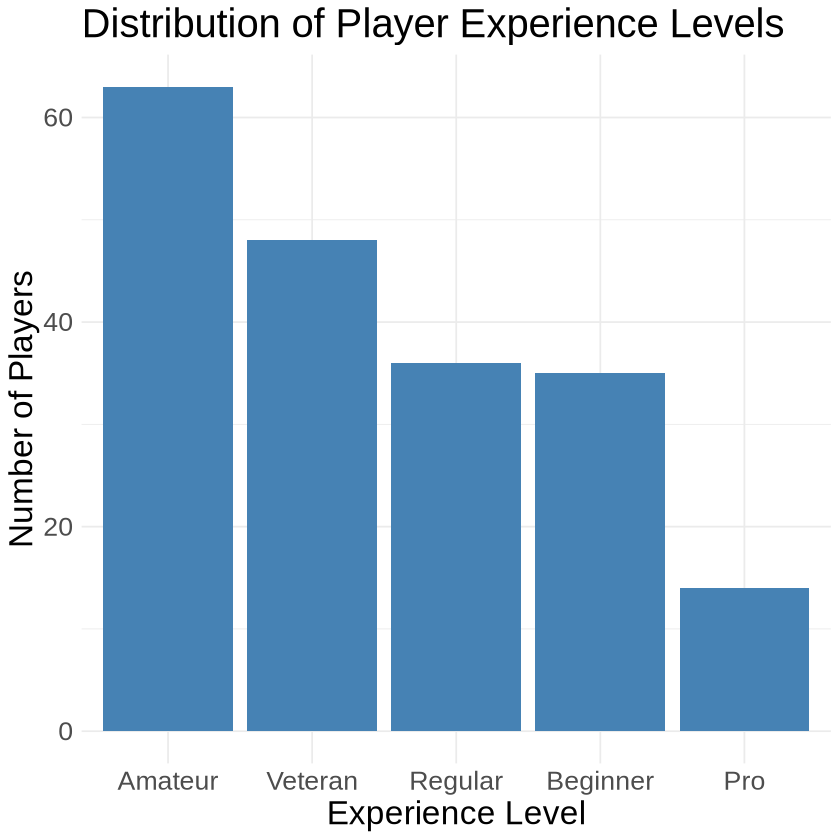

In [9]:
# Visualize distribution of player experience levels
experience_dist_plot <- experience_dist |>
    ggplot(aes(x = fct_reorder(experience, -n), y=n)) +
        geom_bar(stat = "identity", fill = "steelblue") +
        labs(
            title = "Distribution of Player Experience Levels",
            x = "Experience Level",
            y = "Number of Players"
        ) +
        theme_minimal() +
        theme(text = element_text(size = 20))
experience_dist_plot

Warning message:
“Removed 71 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 71 rows containing missing values or values outside the scale range
(`geom_point()`).”


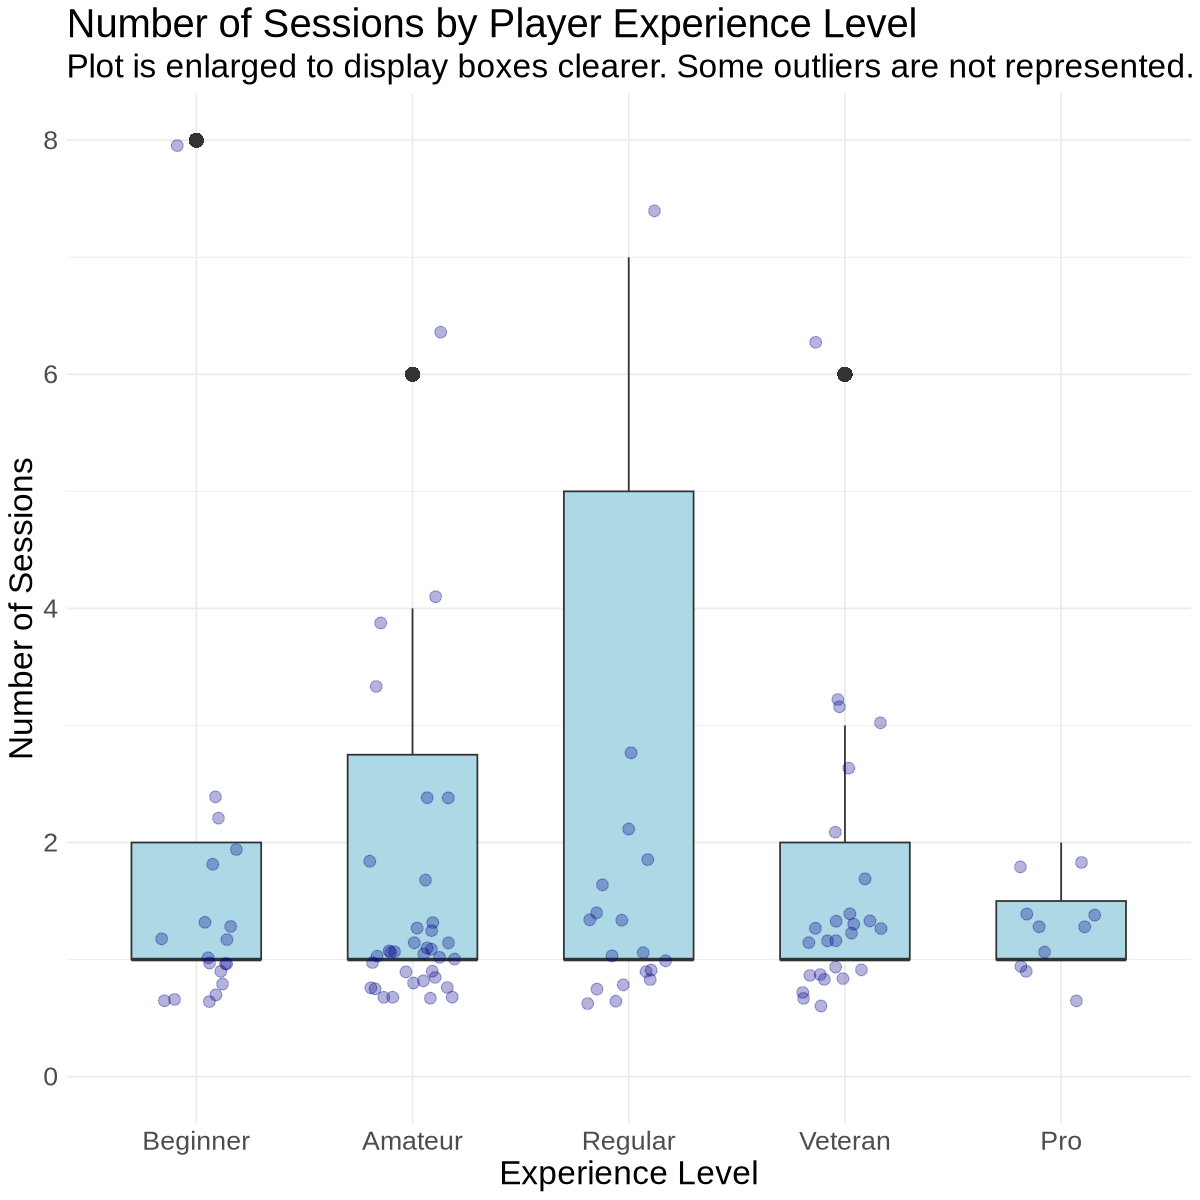

In [10]:
# Create a dataset of session counts per player
session_counts <- sessions |>
    group_by(hashed_email) |>
    summarize(session_count = n())

# Join with player data
experience_order <- c("Beginner", "Amateur", "Regular", "Veteran", "Pro")
player_sessions <- left_join(players, session_counts, by = "hashed_email") |> # adds session_count column to players df
    mutate(experience = factor(experience, levels = experience_order))

# Visualize session counts by experience level
options(repr.plot.width = 10, repr.plot.height = 10)

sessions_per_experience_plot <- player_sessions |>
    ggplot(aes(x = experience, y = session_count)) +
        geom_boxplot(fill = "lightblue", outlier.shape = 16, outlier.size = 4, width = 0.6) +
        # Add this to limit the y-axis and make the boxes more visible
        coord_cartesian(ylim = c(0, 8)) +  # Adjust the upper limit based on the data
        # Add jittered points to see the data distribution better
        geom_jitter(width = 0.2, alpha = 0.3, size = 3, color = "darkblue") +
        labs(
            title = "Number of Sessions by Player Experience Level",
              subtitle = "Plot is enlarged to display boxes clearer. Some outliers are not represented.",
            x = "Experience Level",
            y = "Number of Sessions"
        ) +
        theme_minimal() +
        theme(text = element_text(size = 20))
sessions_per_experience_plot

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 73 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 73 rows containing missing values or values outside the scale range
(`geom_point()`).”


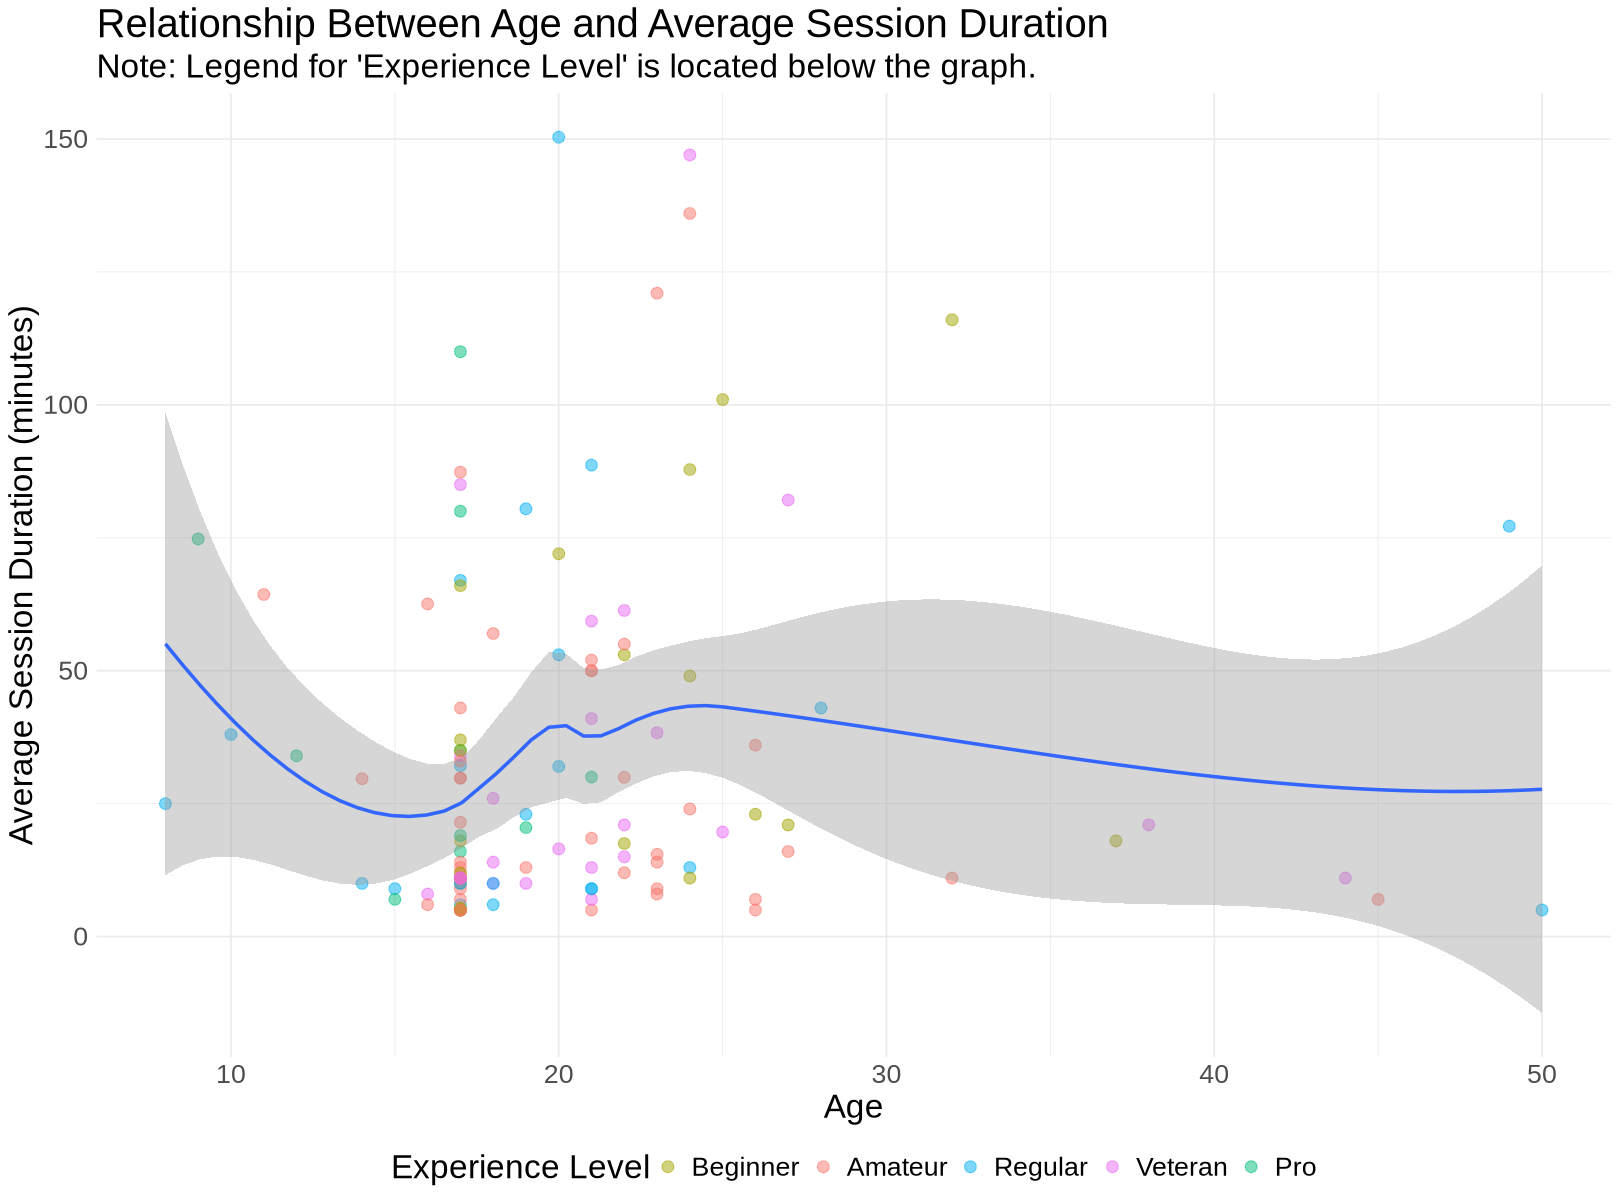

In [11]:
# Calculate average session duration per player
mean_duration_minutes <- sessions |>
    group_by(hashed_email) |>
    summarize(mean_duration_minutes = mean(duration_minutes, na.rm = TRUE))

# Join with player data
player_duration <- left_join(players, mean_duration_minutes, by = "hashed_email")

# Visualize relationship between age and session duration
options(repr.plot.width = 13.5, repr.plot.height = 10)

age_session_plot <- player_duration |>
    ggplot(aes(x = age, y = mean_duration_minutes)) +
        geom_point(aes(color = experience), alpha = 0.5, size = 3) +
        geom_smooth(method = "loess", se = TRUE) +
        labs(
            title = "Relationship Between Age and Average Session Duration",
            subtitle = "Note: Legend for 'Experience Level' is located below the graph.",
            x = "Age",
            y = "Average Session Duration (minutes)",
            color = "Experience Level"
        ) +
        theme_minimal() +
        theme(text = element_text(size = 20)) + 
        scale_color_discrete(breaks = experience_order) +
        theme(legend.position = "bottom")  # Move legend to bottom
age_session_plot

[1] "Peak age density around: 17.1 years old."


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


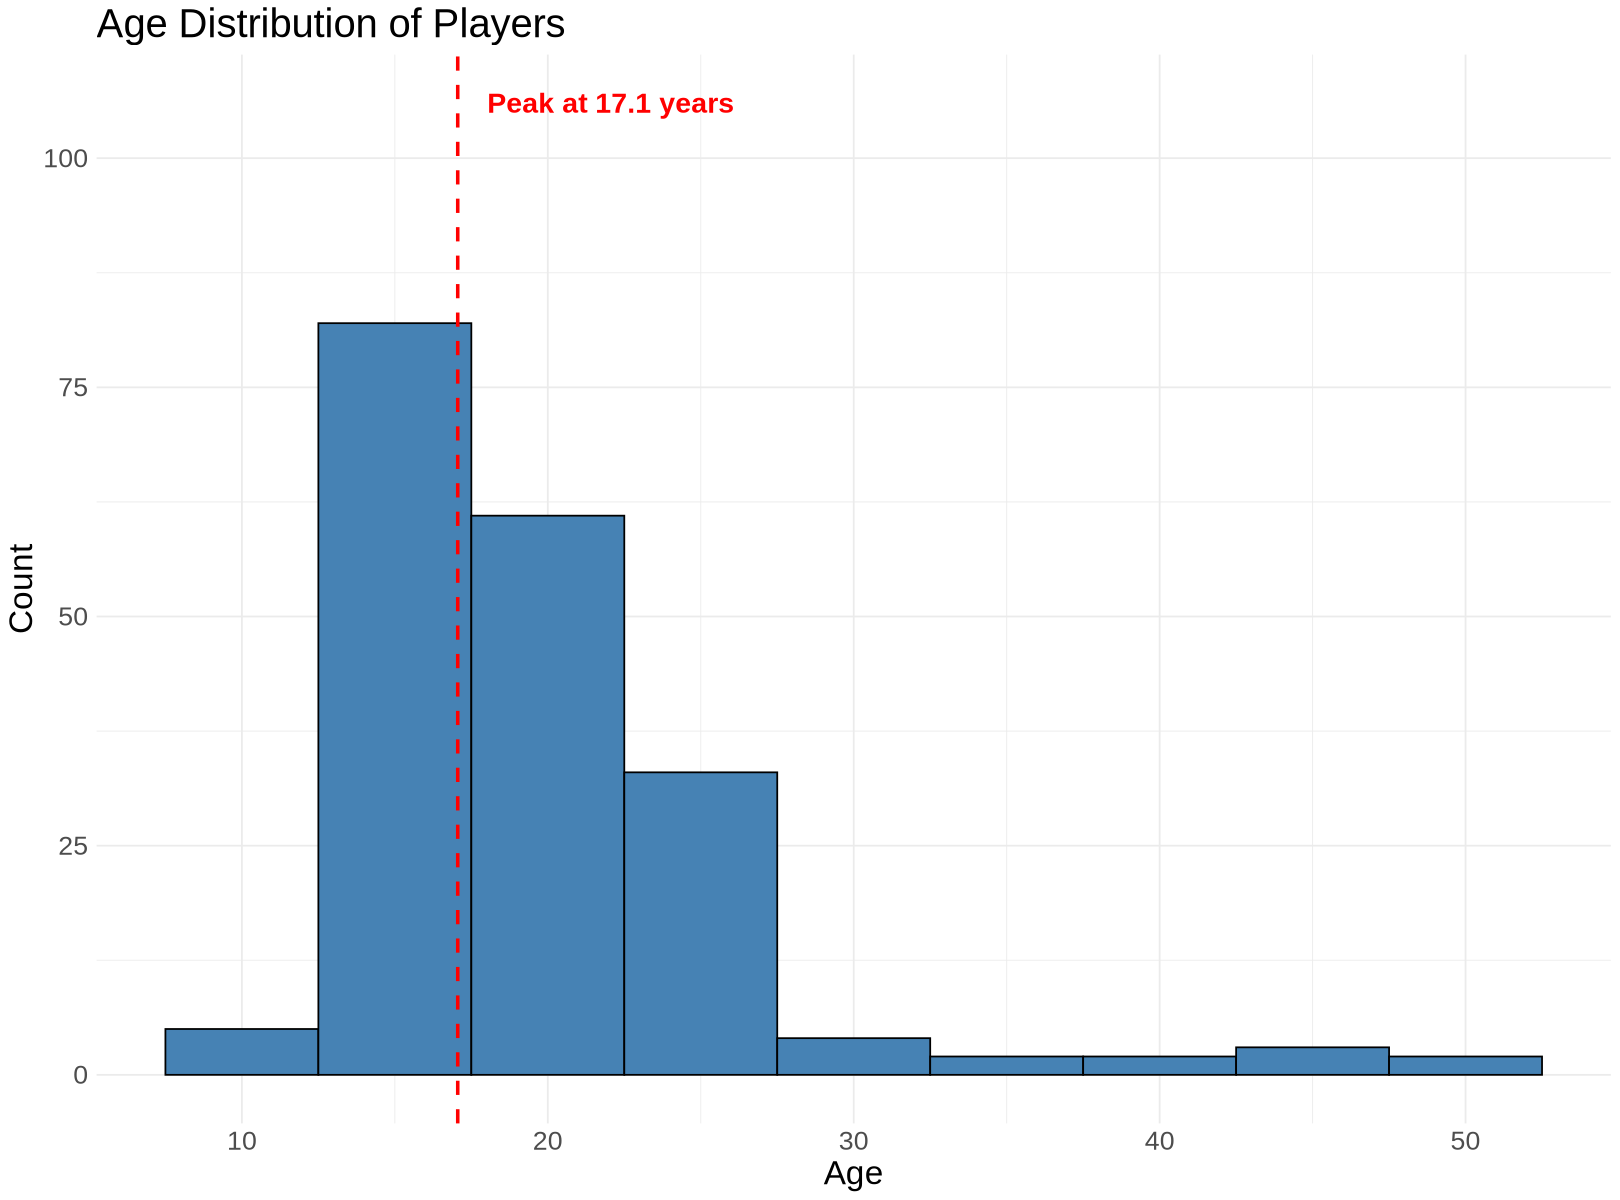

In [12]:
# Using density estimation with pipe operator
peak_age <- players |>
    pull(age) |>
    density(na.rm = TRUE) |>
    (\(d) d$x[which.max(d$y)])()

print(paste("Peak age density around:", round(peak_age, 1), "years old."))

# Visualize with a histogram using pipes
peak_age_plot <- players |>
    ggplot(aes(x = age)) +
        geom_histogram(binwidth = 5, fill = "steelblue", color = "black") +
        geom_vline(xintercept = peak_age, color = "red", linetype = "dashed", size = 1) +
        annotate(
            "text", 
            x = peak_age + 5, 
            y = players |> 
                pull(age) |> 
                cut(breaks = seq(0, 100, by = 5)) |> 
                table() |> 
                max(), 
            label = paste("Peak at", round(peak_age, 1), "years"), 
            color = "red", 
            size = 6,  # Controls text size - increase this value
            fontface = "bold") +  # Optional: make text bold
        labs(
            title = "Age Distribution of Players", 
            x = "Age", 
            y = "Count") +
        theme_minimal() +
        theme(text = element_text(size = 20))
peak_age_plot

**Insights:**

1. There is a significant variance in session counts across different experience levels, with Amateur, Regular and Veteran players generally contributing more sessions than Beginners and Pros.

2. The relationship between age and session duration suggests that younger players (i.e. 8-11 year) have longer average session durations. Duration dips around 15-17 years.

3. The distribution of experience levels shows that Amateur and Veteran players form the largest groups while Pro players form the smallest.

4. The age distribution peaks around age 17, indicating that this is the most common age demographic in the player base. 

## Methods and Plan

I propose using a **Random Forest regression model**. This approach will allow us to predict total session time based on player characteristics and behavior patterns.

### Why is this method appropriate?

1. **Complex relationships**: Random Forests can capture non-linear relationships between variables, which is important given the likely complex relationship between player demographics, experience levels, and session time.

2. **Feature importance**: The model provides measures of variable importance, helping identify the most influential factors for data contribution.

3. **Robustness**: Random Forests handle mixed data types well (categorical variables like experience level and continuous variables like age) and are resistant to overfitting.

4. **Missing data handling**: The method can handle missing values, which appears to be an issue in some variables like age.

### Required assumptions:

The Random Forest method has fewer assumptions than many statistical models:
- No assumption of linearity between predictors and response
- No formal distributional assumptions for predictor variables
- Independence of observations (one player's behavior doesn't directly influence another's)

### Potential limitations:

1. **Interpretability**: While feature importance is available, the model doesn't provide simple coefficients like linear regression, making some aspects harder to interpret.

2. **Data quality**: The model's performance depends on having sufficient and representative data across all player types, which may be challenging if certain groups are underrepresented.

3. **Temporal dynamics**: Player behavior may change over time, which a static model won't capture without additional time-based features.

4. **Predictive vs. causal**: The model will identify correlations but not necessarily causal relationships, which may limit some recruitment strategy insights.

### Model comparison and selection:

I will compare the Random Forest model with:
- Linear regression (baseline)
- Gradient Boosting Machine

Models will be evaluated using:
- Root Mean Squared Error (RMSE)
- Cross-validation scores to assess generalizability 

### Data processing plan:

1. **Data preparation**:
   - Join players and sessions data using hashed_email
   - Calculate derived features (total session time, average session duration, session frequency)
   - Handle missing values (imputation where appropriate)
   - Encode categorical variables

2. **Data splitting**:
   - 70% training set, 30% testing set
   - Stratified by experience level to ensure representative distribution
   - Random seed will be set for reproducibility

3. **Cross-validation**:
   - 5-fold cross-validation within the training set
   - This helps tune hyperparameters and evaluate model stability

4. **Feature engineering**:
   - Create interaction terms between age and experience level
   - Normalize session counts and durations
   - Create player engagement metrics (sessions per week, average time of day)